# Evaluation Feedzai Model

import statements:

In [1]:
import sys
sys.path.append('../')

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from keras.layers import Dense, Dropout

import tensorflow as tf
import numpy as np
from tqdm import tqdm
from keras.layers import Dense, Dropout, GRU


import tensorflow as tf
import numpy as np

from machine_learning.models import FeedzaiProduction
from data_processing.batch_generator import load_test_set
tf.random.set_seed(42)

define model:

In [3]:
model = FeedzaiProduction()


In [4]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(),
            tf.keras.metrics.TruePositives(), 
            tf.keras.metrics.TrueNegatives(),
            tf.keras.metrics.FalsePositives(), 
            tf.keras.metrics.FalseNegatives(),
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])


### Dataset

In [5]:
path = '../data'
BATCH_SIZE = 1024
SEQUENCE_LENGTH = 100

In [6]:
test_transactions = np.load(f'{path}/test/transactions.npy')
test_labels = np.load(f'{path}/test/all_transaction_labels.npy').astype(float)
test_set = tf.data.Dataset.from_tensor_slices((test_transactions, test_labels)).batch(1)
# initialize weights
model(np.expand_dims(test_transactions[0], axis=0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.55065703]], dtype=float32)>

### Evaluate Model

In [11]:
num_epochs = 20

In [12]:
results = []
for epoch in range(num_epochs):
    print(f"[EPOCH {epoch}]")
    model_path = f'../machine_learning/saved_models/feedzai/Feedzai_{epoch}.keras'
    model.load_weights(model_path)
    model.card_gru.reset_states()

    results.append(model.evaluate(test_set, return_dict=True))

[EPOCH 0]
555719/555719 [==============================] - 435s 782us/step - loss: 0.0251 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00
[EPOCH 1]
555719/555719 [==============================] - 469s 844us/step - loss: 0.0244 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00
[EPOCH 2]
555719/555719 [==============================] - 481s 866us/step - loss: 0.0243 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00
[EPOCH 3]
555719/555719 [==============================] - 484s 872us/step - loss: 0.0243 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 

In [13]:
import pandas as pd

pd.DataFrame(results)

,loss,binary_accuracy,true_positives,true_negatives,false_positives,false_negatives,precision,recall
0,0.025063,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
1,0.024425,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
2,0.024337,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
3,0.024348,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
4,0.019853,0.996018,128.0,553378.0,196.0,2017.0,0.395062,0.059674
5,0.022112,0.996138,2.0,553571.0,3.0,2143.0,0.400000,0.000932
6,0.031016,0.996291,117.0,553541.0,33.0,2028.0,0.780000,0.054545
7,0.017443,0.996468,251.0,553505.0,69.0,1894.0,0.784375,0.117016
8,0.046067,0.984721,1532.0,545696.0,7878.0,613.0,0.162806,0.714219
9,0.010728,0.997927,1215.0,553352.0,222.0,930.0,0.845511,0.566434


Looking at the metrics, the one which yielded the best results was at **epoch 9** with the best balance between precision and recall:

### Confusion Matrix

In [7]:
model.load_weights(f'../machine_learning/saved_models/feedzai/Feedzai_{9}.keras')
inputs = [[553352/(553352+222), 222/(553352+222)], [930/(1215+930), 1215/(1215+930)]]

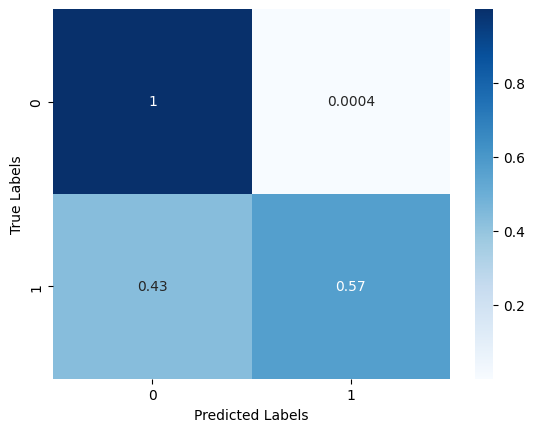

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using a heatmap
sns.heatmap(inputs, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [9]:
y_pred_proba = model.predict(test_set)

555719/555719 [==============================] - 255s 458us/step


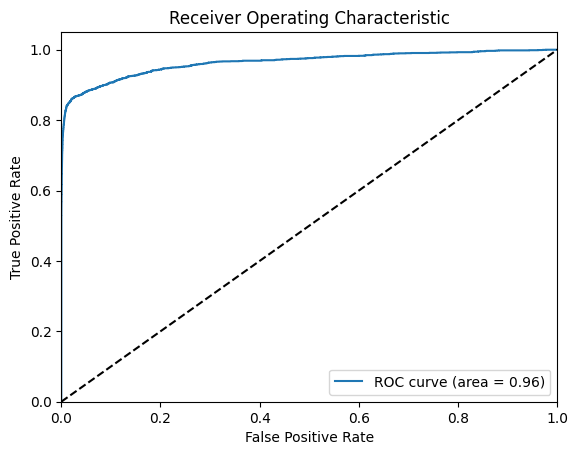

In [10]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds using NumPy
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculate AUC using scikit-learn
auc_score = auc(fpr, tpr)

# Plot ROC curve using Matplotlib
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
